# Lab3 -Lecture4 Textual Data

## 1. Find the top 10 word bigram from UN General Debates of years 1970 – 1990 and compare with those of years 1990 – the latest (remove stopwords fir

In [265]:
import pandas as pd
from collections import Counter
import numpy as np
import nltk
import seaborn as sns

In [199]:
df = pd.read_csv('un-general-debates-blueprint.csv')

In [200]:
df.sample(3)

,session,year,country,country_name,speaker,position,text
7240,69,2014,MRT,Mauritania,Mohamed Ould Abdel Aziz,President,On \nbehalf of the African Union and of the Is...
1914,39,1984,LBN,Lebanon,Karame,NaN,"﻿On behalf of Lebanon and on my own behalf, al..."
4536,55,2000,IRQ,Iraq,Mohammed Said Al-Sahaf,Minister for Foreign Affairs,It is my\npleasure to congratulate Mr. Harri H...


In [201]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [209]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [210]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [211]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [212]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [213]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [214]:
pipeline = [str.lower, tokenize, remove_stop, ngrams]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [215]:
def count_words(df, column='bigrams', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'bigrams'
    
    return freq_df.sort_values('freq', ascending=False)

In [216]:
df['bigrams'] = df["text"].apply(prepare, pipeline=pipeline)

In [217]:
df

,session,year,country,country_name,speaker,position,text,bigrams,tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,"[may first, first convey, convey president, pr...","[may, first, convey, president, congratulation..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,"[fortunate coincidence, coincidence precisely,...","[fortunate, coincidence, precisely, time, unit..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,"[pleasure extend, extend mr, mr president, pre...","[pleasure, extend, mr, president, warmest, con..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,"[may begin, begin expressing, expressing ambas...","[may, begin, expressing, ambassador, hambro, b..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...","[doubt us, us coming, coming rostrum, rostrum ...","[doubt, us, coming, rostrum, wonders, usefulne..."
...,...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,"[behalf people, people government, government ...","[behalf, people, government, yemen, would, lik..."
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,"[seventy years, years passed, passed since, si...","[seventy, years, passed, since, establishment,..."
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,"[like congratulate, congratulate president, pr...","[like, congratulate, president, country, denma..."
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,"[would like, like begin, begin thanking, thank...","[would, like, begin, thanking, secretary-gener..."


In [218]:
bigram1 = df.query('1970 <= year <= 1990')
bigram2 = df.query('year >= 1990')

In [219]:
df_bigram1 = count_words(bigram1, column='bigrams')
df_bigram1.head(10)

,freq
bigrams,
united nations,43846
general assembly,13915
developing countries,11991
international community,11506
south africa,9300
united states,7718
middle east,7608
security council,7500
peace security,6755


In [220]:
df_bigram2 = count_words(bigram2, column='bigrams')
df_bigram2.head(10)

,freq
bigrams,
united nations,61529
international community,16924
security council,14040
general assembly,13694
human rights,13658
peace security,8704
developing countries,7027
member states,6037
sustainable development,5281


## 2. Create a bigram word cloud of the UN General Debates dataset of years 1970 – 1990 and 1990 to the latest (remove stopwords first)

In [221]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [222]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="spring", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

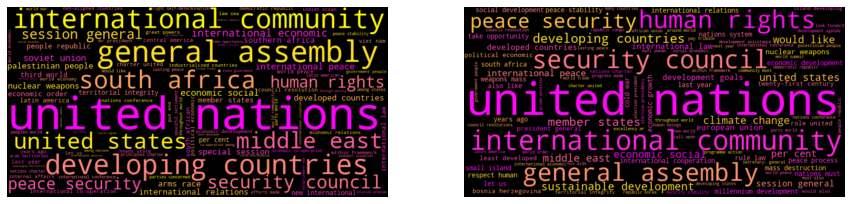

In [223]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
wc_bigram1 = wordcloud(df_bigram1['freq'], max_words=100)
plt.subplot(1,2,2)
wc_bigram2 = wordcloud(df_bigram2['freq'], max_words=100)

## 3. Create a trend graph showing the bigram and word trend of “climate change”, “global warming”, “wars” and 3 others of your choices

In [244]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [245]:
def count_keywords_by(df, by, keywords, column='tokens'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

In [295]:
unigrams = [ 'wars', 'president']
bigrams = ['climate change', 'global warming', 'human rights', 'international peace']

In [296]:
freq_df_uni = count_keywords_by(df, by='year', keywords=unigrams, column = 'tokens')
freq_df_bi = count_keywords_by(df, by='year', keywords=bigrams, column = 'bigrams')

In [297]:
freq_df_uni

,wars,president
year,,
1970,38,264
1971,85,400
1972,88,406
1973,72,431
1974,70,450
1975,54,356
1976,55,433
1977,36,450
1978,67,482


In [298]:
freq_df_bi

,climate change,global warming,human rights,international peace
year,,,,
1970,0,0,143,123
1971,0,0,119,161
1972,0,0,124,148
1973,0,0,200,128
1974,0,0,127,131
1975,0,0,212,159
1976,0,0,350,200
1977,0,0,646,168
1978,0,0,648,179


<AxesSubplot:xlabel='year'>

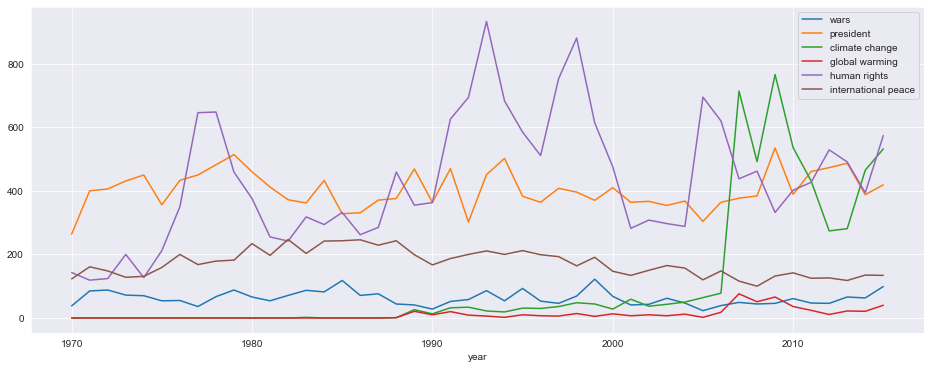

In [299]:
sns.set_style("darkgrid")
ax = freq_df_uni.plot(kind='line', figsize=(16,6))
freq_df_bi.plot(ax=ax)